In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

import os, glob

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
img_list = sorted(glob.glob('gdrive/My Drive/Colab Notebooks/Unet/CT_lung_segmentation-master/2d_images/*.tif'))
#img_list = sorted(glob.glob('2d_images/*.tif'))
mask_list = sorted(glob.glob('gdrive/My Drive/Colab Notebooks/Unet/CT_lung_segmentation-master/2d_masks/*.tif'))
#mask_list = sorted(glob.glob('2d_masks/*.tif'))

print(len(img_list), len(mask_list)) #both are 267

267 267


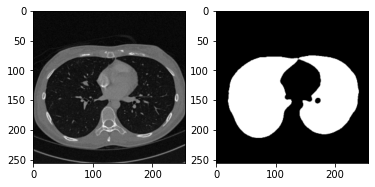

In [ ]:
IMG_SIZE = 256

x_data, y_data = np.empty((2, len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img
    
y_data /= 255.

fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_data[12].squeeze(), cmap='gray')
ax[1].imshow(y_data[12].squeeze(), cmap='gray')

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)

np.save('gdrive/My Drive/Colab Notebooks/Unet/CT_lung_segmentation-master/dataset/x_train.npy', x_train)
#np.save('dataset/x_train.npy', x_train)

np.save('gdrive/My Drive/Colab Notebooks/Unet/CT_lung_segmentation-master/dataset/y_train.npy', y_train)
#np.save('dataset/y_train.npy', y_train)

np.save('gdrive/My Drive/Colab Notebooks/Unet/CT_lung_segmentation-master/dataset/x_val.npy', x_val)
#np.save('dataset/x_val.npy', x_val)

np.save('gdrive/My Drive/Colab Notebooks/Unet/CT_lung_segmentation-master/dataset/y_val.npy', y_val)
#np.save('dataset/y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)
